In [40]:
# 2021/02/02 논문 읽어보기
# Deep Residual Learning for Image Recognition
# 이미지 인식을 위한 심층 잔차 학습
# Link : https://arxiv.org/pdf/1512.03385v1.pdf
# Link 2 : https://89douner.tistory.com/64

In [2]:
# Resnet은 Neural Networks가 Deep할수록 학습하기 어렵다는 문제를 해결하기위해
# 이전의 학습방법들과 달리 residual(잔차)를 학습하는 방법을 사용했다.
# residual networks는 optimize하기 쉽고 deep model의 accuracy를 더욱 쉽게 얻을 수 있다는 것을 증명했다.

# VGGNET보다 8배 깊은 152개의 Layers를 가진 residual nets로 ImageNet을 학습 후 평가, 3.57%의 error
# CIFAR-10, COCO detection, COCO segmentation 등에 좋은 성능을 보였다.

In [3]:
# Introduction
# Deep Convolutional Neural Networks는 Image Classification 분야에 있어서 획기적인 발전을 이루어냄

In [12]:
from PIL import Image
import matplotlib.image as img
import matplotlib.pyplot as plt

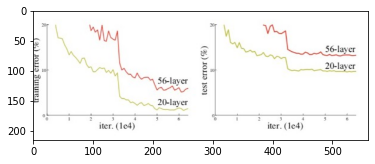

In [17]:
image = img.imread('./Deep_Residual_Learning_for_Image_Recognition/1.jpg')
plt.imshow(image)
plt.show()

In [29]:
# 왼쪽 : Training Error / 오른쪽 : Test error.
# 20layer보다 56layer의 training error가 더 많다.

In [19]:
# 모델의 Depth의 깊이와 성능이 비례할까? 라는 궁금증이 생김

In [20]:
# 하지만 Gradient Vanishing / Exploding의 문제때문에 depth가 증가해도
# 일정 수준에 다다르면 성능이 떨어짐

In [22]:
# ※Gradient Vanishing 이란?
# - neural network의 weight가 계속 전파되면서 초기의 weight를 잃고 기울기가 0에 수렴하는 현상
# - 반대로 초기의 weight가 무한히 커지는 현상은 exploding이라고 함.

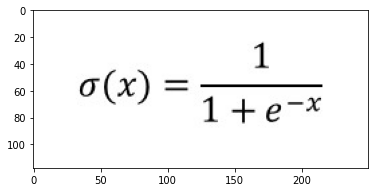

In [24]:
image2 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/sigmoid_function.jpg')
plt.imshow(image2)
plt.show()

In [25]:
# sigmoid function은 위의 식과 같이 input의 값을 0과 1사이의 값으로 변환시킨다.
# 이는 기존의 신경망에서 가장 기본적으로 사용하는 activation function.


In [26]:
# 위의 현상이 나타나면 depth가 증가함에따라 accuracy가 더이상 증가하지않고, degrade가 빨리지는데,
# 미분한 시그모이드 함수가 중간값이 0.25고, 양 끝값이 0에 수렴하기때문

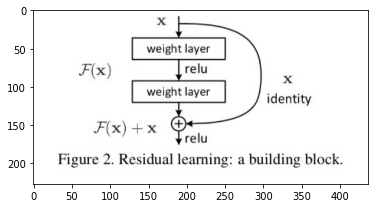

In [27]:
image3 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/relu.jpg')
plt.imshow(image3)
plt.show()

In [32]:
# 기존의 feature값 x와 F(x)를 가져와서 재사용

In [30]:
# 보통 CNN 모델은 Feature(x값)이 입력되면 layers를 거쳐 H(X)가 나오는데,
# Residual Learning은 기존 layer에서 사용된 residual feature (2 layer 이전의 feature(x)와 바로 직전의 feature F(x)를 connection하여 H(x)를 재정의함.

In [31]:
# 이러한 connection을 논문에서는 short connection이라고 함
# (few layers 간의 connection을 뜻함)

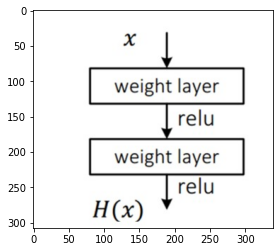

In [33]:
image4 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/no_identity_mapping.jpg')
plt.imshow(image4)
plt.show()

In [34]:
# identity mapping이 적용되지 않은 예시

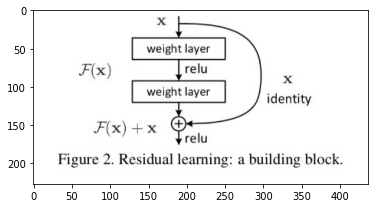

In [35]:
image3 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/relu.jpg')
plt.imshow(image3)
plt.show()

In [37]:
# identity mapping + short(skip) connection 개념 적용 예시

In [2]:
# H(x)는 x를 입력으로 했을때 target값 y로 mapping 시키는 함수
# 여기서는 H(x) - x를 0으로 만드는 방향으로 학습이 진행됨.
# H(x)와 x값의 잔차(residual)을 학습하기때문에 residual learning이라고 함
# H(x)는 identity function. 항등함수로 가정하고 진행한 것임

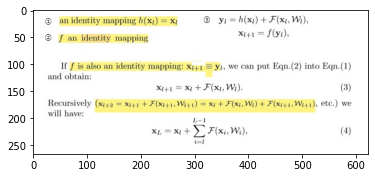

In [41]:
image5 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/identity_mapping.jpg')
plt.imshow(image5)
plt.show()

In [3]:
#위와 같은 수식은 역전파, backprogation을 통해 학습을 할 경우 vanishing gradient 문제를 피할 수 있게 도와준다.

In [5]:
# MS는 Deep CNN plain 모델과 / residual learning을 적용시킨 resnet 모델을 비교분석 시킴.

In [6]:
# imagenet, CIFAR-10 데이터셋에서 모두 resnet이 더 우수하게 나옴.
# 더 깊은 망을 구성하면서 더 좋은 성능을 내는 결과. (error rate 3.57%)

In [8]:
##### 논문 리뷰를 더 하기 전에 역전파에 대해 공부를 하고 가자 #####

In [9]:
# backpropagation. 오차역전파

In [10]:
# 모델이 계산한 output값과 실제 y값의 오차값을 지나왔던 노드로 다시 전파해가면서
# 각각의 weight 값을 다시 갱신하는 과정.

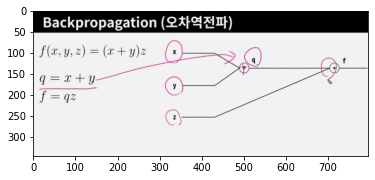

In [14]:
# example
# f(x,y,z) = (x + y)z
# q = x + y
# f = qz
image6 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/backpropagation.jpg')
plt.imshow(image6)
plt.show()

In [16]:
x = -2
y = 5
z = -4
q = x + y
f = q*z

print(q, f)

3 -12


In [17]:
# 이러한 방식을 forward pass 라고 함. 순방향 계산

In [18]:
# 이때, q를 x에 대해 미분하고, q를 y에 대해 미분한다면?
# == x가 x2만큼 변했을때, q는 얼만큼 변하는가? // y가 y2만큼 변했을때, q는 얼만큼 변하는가?

In [19]:
# q를 f에 대해 미분 : -4 = z
# q를 z에 대해 미분 : 3 = (x + y) = (-2 + 5)

In [20]:
# 궁극적으로 구해야 하는것은 f를 x에 대해 미분한 값.
# x가 변할때, f 가 얼만큼 변하는가?

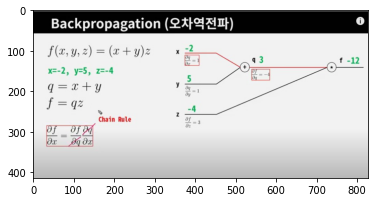

In [21]:
# 이때는 chain rule을 사용하여 계산
image7 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/backpropagation2.jpg')
plt.imshow(image7)
plt.show()

In [22]:
# df/dq = -4, dq/d = 1. 즉 df/dx = -4

In [24]:
# 즉 x가 1만큼 증가할때, f는 -4만큼 증가했다는것을 알수있다.
# 여기서 주목할 점은, x,y,z 첫번째 단에서 받은 값을 local gradient,
# q 값을 global gradient라고 한다.
# forward pass시 lical gradient를 미리 구해서 저장할 수 있다.

In [25]:
# 맨 마지막 Loss에 대한 편미분을 구하려할때, dLoss/dx 를 구하고 싶은건데,
# q 단계까지 계산된 global gradient 값이 있으면 local gradient와 global gradient의 곱으로 loss를 구할 수 있다. chain rule 사용

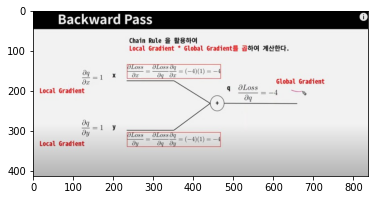

In [27]:
image8 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/backpropagation3.jpg')
plt.imshow(image8)
plt.show()

In [28]:
### chain rule을 활용하면 깊고 복잡한 층으로 구성되어 있어도 미분값을 구할 수 있다.
### Forward pass시 local gradient를 미리 계산해서 저장.
### lcaol graidnet와 global gradient를 backward pass시 곱하여 최종 미분값을 얻을 수 있다.

In [29]:
### Convolution 합성곱에 대한 개념을 제대로 이해하고 가자 ###

#참고 영상 : https://www.youtube.com/watch?v=BfzUCEXmOm0 [cnn합성곱신경망의 기본개념]

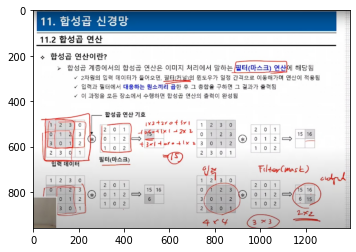

In [30]:
image9 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution.jpg')
plt.imshow(image9)
plt.show()

In [37]:
# 연산을 할 수록 매트릭스의 사이즈가 작아진다.
# 또한 bias(편향) 을 더해서 출력값을 바꿀 수 있다.
# 편향은 1개의 값으로 존재.

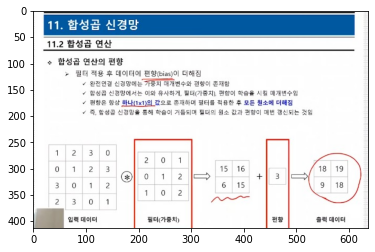

In [32]:
image10 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution2.jpg')
plt.imshow(image10)
plt.show()

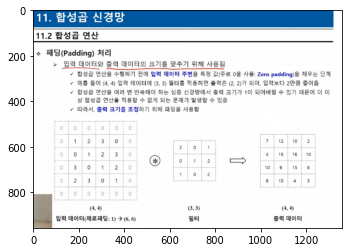

In [33]:
image11 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution3.jpg')
plt.imshow(image11)
plt.show()

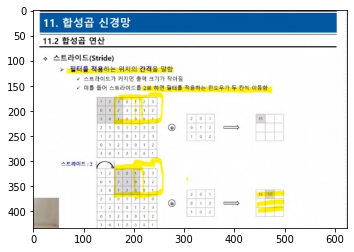

In [34]:
# stride : 필터를 적용하는 위치의 간격.
# 위의 사진들은 stride가 1인데, 2로 옮기면 한번 계산후, 2칸씩 이동한다.
image12 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution4.jpg')
plt.imshow(image12)
plt.show()

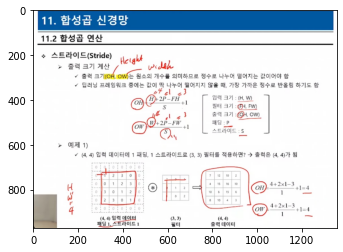

In [35]:
image13 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution5.jpg')
plt.imshow(image13)
plt.show()

In [36]:
# 출력 데이터의 h,w를 구하는 식

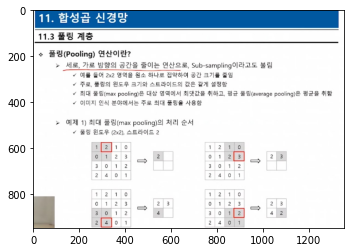

In [38]:
image14 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution6.jpg')
plt.imshow(image14)
plt.show()

In [39]:
# 특징

In [40]:
# 1. 매개변수가 따로 없다.
# 2. 채널수의 변화가 없다.
# 3. 최댓값을 가져오기때문에 풀링 윈도우안의 다른 값들이 변해도 상대적으로 robust하다. (무조건 큰값을 가져오기 때문에)

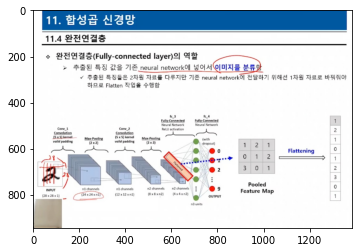

In [41]:
image15 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution7.jpg')
plt.imshow(image15)
plt.show()

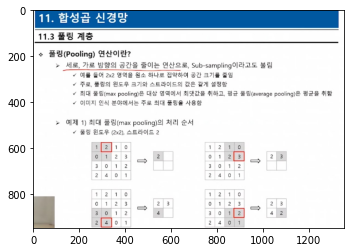

In [42]:
image16 = img.imread('./Deep_Residual_Learning_for_Image_Recognition/convolution6.jpg')
plt.imshow(image16)
plt.show()